# BPNN on Dengue & Malaria Prediction

### Pre-processing 

In [942]:
# import library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [943]:
train = pd.read_csv('Training_MD.csv')
test= pd.read_csv('Testing_MD.csv')
train.head()

,skin_rash,chills,joint_pain,vomiting,fatigue,high_fever,sweating,headache,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,diarrhoea,malaise,muscle_pain,red_spots_over_body,prognosis
0,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1
1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1
2,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1
3,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1
4,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1


In [944]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   skin_rash             240 non-null    int64
 1   chills                240 non-null    int64
 2   joint_pain            240 non-null    int64
 3   vomiting              240 non-null    int64
 4   fatigue               240 non-null    int64
 5   high_fever            240 non-null    int64
 6   sweating              240 non-null    int64
 7   headache              240 non-null    int64
 8   nausea                240 non-null    int64
 9   loss_of_appetite      240 non-null    int64
 10  pain_behind_the_eyes  240 non-null    int64
 11  back_pain             240 non-null    int64
 12  diarrhoea             240 non-null    int64
 13  malaise               240 non-null    int64
 14  muscle_pain           240 non-null    int64
 15  red_spots_over_body   240 non-null    int64
 16  prognosi

In [945]:
train.shape

(240, 17)

In [946]:
train.isna().sum() # calculation of the missing value

skin_rash               0
chills                  0
joint_pain              0
vomiting                0
fatigue                 0
high_fever              0
sweating                0
headache                0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
back_pain               0
diarrhoea               0
malaise                 0
muscle_pain             0
red_spots_over_body     0
prognosis               0
dtype: int64

In [947]:
train.nunique() # checking unique value on all attribute

skin_rash               2
chills                  2
joint_pain              2
vomiting                2
fatigue                 2
high_fever              2
sweating                2
headache                2
nausea                  2
loss_of_appetite        2
pain_behind_the_eyes    2
back_pain               2
diarrhoea               2
malaise                 2
muscle_pain             2
red_spots_over_body     2
prognosis               2
dtype: int64

In [948]:
X = train.drop('prognosis',axis=1)
X #X are in DataFrame, its easy to change it into array to match with the target

,skin_rash,chills,joint_pain,vomiting,fatigue,high_fever,sweating,headache,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,diarrhoea,malaise,muscle_pain,red_spots_over_body
0,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1
1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1
2,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0
3,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1
4,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0,1,0,1,0,1,1,1,1,0,0,0,1,0,1,0
236,0,1,0,1,0,1,1,1,1,0,0,0,1,0,1,0
237,0,1,0,1,0,1,1,1,1,0,0,0,1,0,1,0
238,0,1,0,1,0,1,1,1,1,0,0,0,1,0,1,0


In [949]:
# change X DataFrame into array 
x = np.array(X)
x.shape

(240, 16)

In [950]:
y = np.array(train['prognosis'])
y = pd.get_dummies(y).values
y.shape

(240, 2)

### Split Dataset

In [951]:
# split data to 80/20 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=20, random_state=0)

### Initialization of the parameters

In [954]:
##### Initialize variables
learning_rate = 0.1
iterations = 560
N = y_train.size

# number of input features
input_size = 16

# number of hidden layers neurons
hidden_size = 2

# number of neurons at the output layer
output_size = 2

results = pd.DataFrame(columns=["mse", "accuracy"])

In [955]:
# Initialize weights
np.random.seed(10)


# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [956]:
W1

array([[ 0.66579325,  0.35763949],
       [-0.77270015, -0.00419192],
       [ 0.31066799, -0.36004278],
       [ 0.13275579,  0.05427426],
       [ 0.00214572, -0.08730011],
       [ 0.21651309,  0.60151869],
       [-0.48253284,  0.51413704],
       [ 0.11431507,  0.22256881],
       [-0.56830111,  0.06756844],
       [ 0.7422685 , -0.53990244],
       [-0.98886414, -0.87168615],
       [ 0.13303508,  1.19248367],
       [ 0.56184563,  0.83631111],
       [ 0.04957461,  0.69899819],
       [-0.13562399,  0.30660209],
       [-0.13365859, -0.27465451]])

### Function for Backpropagation

In [957]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

### Backpropagation Process

In [958]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

______________________________________________________________________________________

In [971]:
# A2.argmax(axis=1)

<AxesSubplot:title={'center':'Mean Squared Error'}>

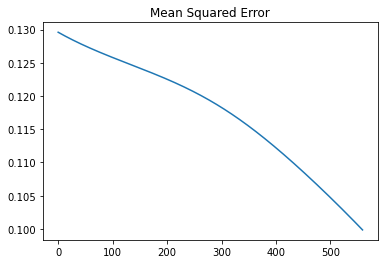

In [972]:
results.mse.plot(title="Mean Squared Error")

Accuracy: 0.9


<AxesSubplot:title={'center':'Accuracy'}>

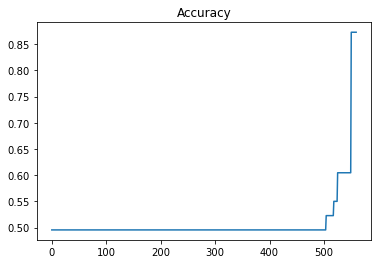

In [973]:
print("Accuracy: {}".format(acc))
results.accuracy.plot(title="Accuracy")

### Testing 

In [974]:
## TEST
# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.9


In [975]:
results_test = pd.DataFrame(columns=["mse", "accuracy"]) 
results_test=results.append({"mse":mse, "accuracy":acc},ignore_index=True )

Accuracy: 0.9


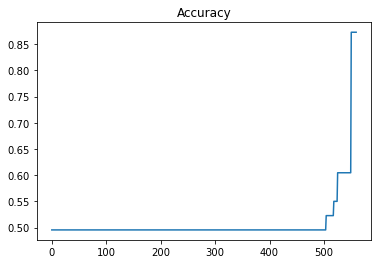

In [976]:
results.accuracy.plot(title="Accuracy")
print("Accuracy: {}".format(acc))

In [977]:
results_test

,mse,accuracy
0,0.129602,0.495455
1,0.129556,0.495455
2,0.129510,0.495455
3,0.129464,0.495455
4,0.129419,0.495455
...,...,...
556,0.100106,0.872727
557,0.100021,0.872727
558,0.099936,0.872727
559,0.099851,0.872727


In [978]:
y_test.argmax(axis=1)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [979]:
A2.argmax(axis=1)

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [980]:
predictions_df = pd.DataFrame( list(A2.argmax(axis=1)), list(y_test.argmax(axis=1)) , columns=['predicted'] )
predictions_df = predictions_df.reset_index()
predictions_df = predictions_df.rename(columns={'index':'prognosis'})

predictions_df['result'] = ''

for x in range(len(predictions_df)) :
    if predictions_df['prognosis'][x] == predictions_df['predicted'][x] :
        predictions_df['result'].iloc[x]='Correct'
    else :
        predictions_df['result'].iloc[x]='Incorrect'

C:\Users\Izzham\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [981]:
predictions_df

,prognosis,predicted,result
0,1,1,Correct
1,1,1,Correct
2,1,0,Incorrect
3,1,1,Correct
4,1,1,Correct
5,0,0,Correct
6,0,0,Correct
7,0,0,Correct
8,0,0,Correct
9,0,0,Correct


In [982]:
correct = len(predictions_df[predictions_df['result']=='Correct'])
total = len(predictions_df)
print(f'{correct} correct prediction out of {total}')

18 correct prediction out of 20


In [983]:
list(A2.argmax(axis=1))

[1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]

In [984]:
list(y_test.argmax(axis=1))

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1]